# **First: Explore the data**

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Read files
product = pd.read_csv('PRODUCTS_TAKEHOME.csv')
trans = pd.read_csv('TRANSACTION_TAKEHOME.csv')
user = pd.read_csv('USER_TAKEHOME.csv')

In [15]:
# Display the first 5 rows of the 'product' DataFrame
# This helps in getting a quick look at the structure of the data
product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [16]:
# Display the first 5 rows of the 'transaction' DataFrame
trans.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [17]:
# Display the first 5 rows of the 'user' DataFrame
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


## **Check Data Quality**

### **1. Missing Values**

In [18]:
# Check for missing values in the 'product' DataFrame
print("Missing values in 'product':")
print(product.isnull().sum())
print("\n")

# Check for missing values in the 'trans' DataFrame
print("Missing values in 'trans':")
print(trans.isnull().sum())
print("\n")

# Check for missing values in the 'user' DataFrame
print("Missing values in 'user':")
print(user.isnull().sum())

Missing values in 'product':
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


Missing values in 'trans':
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


Missing values in 'user':
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64


Visualize Missing Values

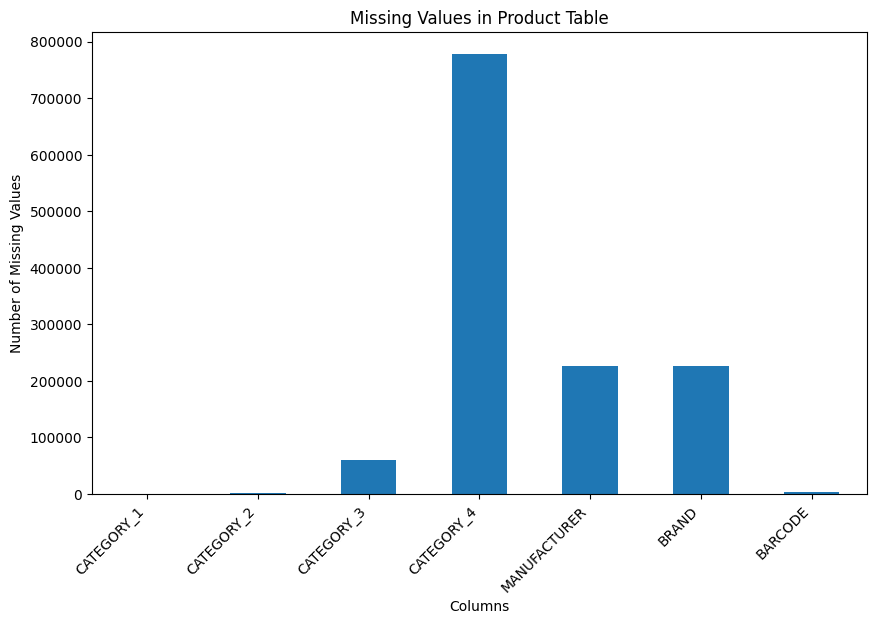

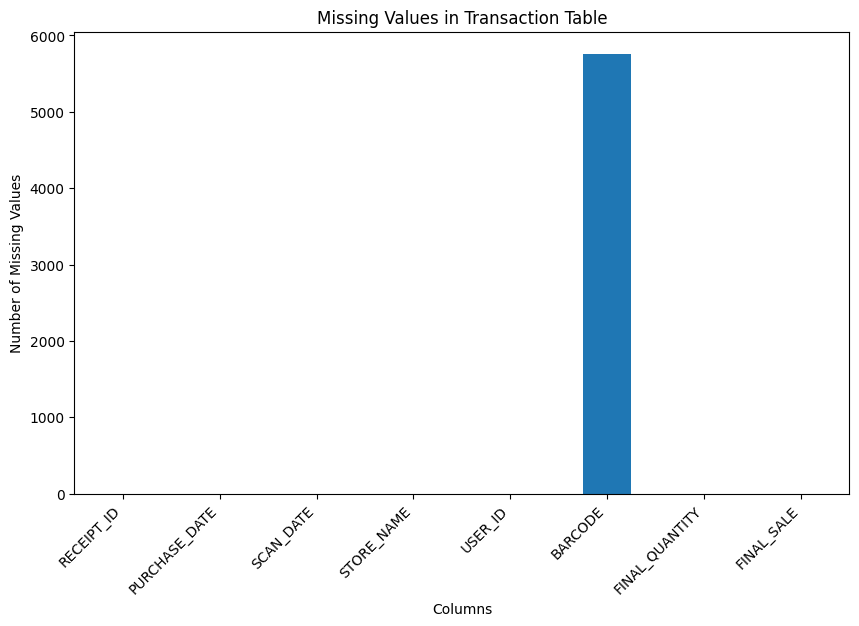

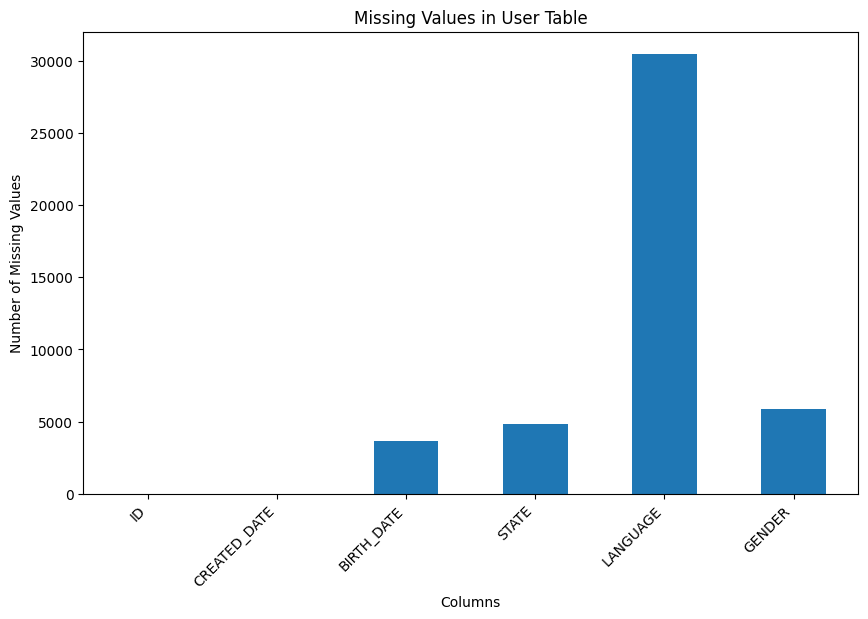

In [19]:
import matplotlib.pyplot as plt

# Define a function to create a bar chart for missing values
def plot_missing_values(df, df_name):
    # Get the count of missing values per column
    missing_values = df.isnull().sum()

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title(f'Missing Values in {df_name} Table')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Visualize missing values in the 'product' DataFrame
plot_missing_values(product, 'Product')

# Visualize missing values in the 'trans' DataFrame
plot_missing_values(trans, 'Transaction')

# Visualize missing values in the 'user' DataFrame
plot_missing_values(user, 'User')


## **2. Duplicate Rows**

In [20]:
# Check for duplicate rows in the 'product' DataFrame
duplicate_product = product.duplicated().sum()

# Check for duplicate rows in the 'trans' DataFrame
duplicate_trans = trans.duplicated().sum()

# Check for duplicate rows in the 'user' DataFrame
duplicate_user = user.duplicated().sum()



# Print the duplicate row counts for reference
print("Duplicate rows in 'product':", duplicate_product)
print("Duplicate rows in 'trans':", duplicate_trans)
print("Duplicate rows in 'user':", duplicate_user)


Duplicate rows in 'product': 215
Duplicate rows in 'trans': 171
Duplicate rows in 'user': 0


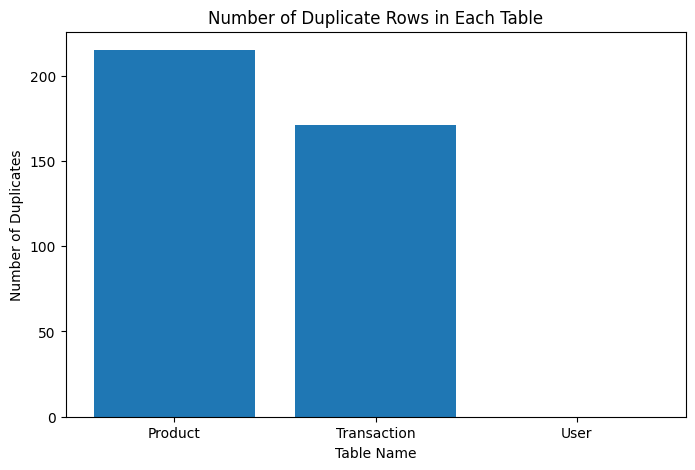

In [21]:
# Create a dictionary with the table names and the number of duplicates
duplicate_counts = {
    'Product': duplicate_product,
    'Transaction': duplicate_trans,
    'User': duplicate_user
}

# Create a bar plot to compare the duplicate rows
plt.figure(figsize=(8, 5))
plt.bar(list(duplicate_counts.keys()), list(duplicate_counts.values()))

# Add labels and title
plt.title('Number of Duplicate Rows in Each Table')
plt.xlabel('Table Name')
plt.ylabel('Number of Duplicates')

# Show the plot
plt.show()

**Are there any data quality issues present?**


1.   Missing Values

  *   In the product table, it's understandable that there are increasing missing values in Category 3 and 4, as not all products have subcategories. However, for the manufacturer and brand columns, there are 226,472 missing values, which makes it difficult to analyze brand information.

  *   In both the product and transaction tables, there are 4,025 and 5,762 missing values for barcodes, respectively. This leads to a significant loss of important product information, which may cause us to miss key insights when analyzing users' product preferences.
  * In the users table, the language column has 30,508 missing values. However, the Fetch App only supports two languages—English and Spanish. This makes me question the reason behind the large number of missing values.
2.   Duplicate Rows

 * There are 215 duplicate rows in the product table, indicating that some products may have been entered multiple times, which could lead to redundancy.
  * There are 171 duplicate rows in the transaction table, suggesting that some transactions might have been recorded more than once, potentially causing incorrect transaction totals.
  * I recommend dropping those duplicate values if it is confirmed that the rows in those tables are an confirmed issue, as this will help improve the accuracy of our analysis.





**Are there any fields that are challenging to understand?**

1. The quantity columns in the transactions table should be of numeric data type, but there are many instances where string "zero" is used. It's unclear why "zero" is written as text instead of using 0 or null, which makes it difficult to understand the purpose.

2. In the transactions table, it seems that some receipt_id has two rows, with the differences being in either the quantity or sales columns. This is confusing and raises questions about why this discrepancy exists.

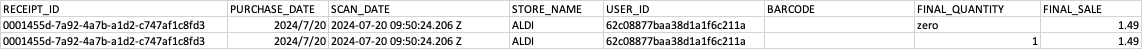

# **Second: Provide queries**

In [22]:
# Install pandasql package which allows running SQL queries on pandas DataFrames
!pip install pandasql

# Import the pandasql package to use SQL queries in Python
import pandasql as ps

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=79b1b6dae46c5946b60139df50d46bbcfe7cccce477059c657f21e777b3c8426
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


## **What are the top 5 brands by receipts scanned among users 21 and over?**

Assumptions:

*   Each receipt may include multiple items, so we count the distinct occurrences of `RECEIPT_ID` rather than the total number of counts.
*   Since there are 6 brands with the same total of 2 receipts scanned, we use `RANK()` to include all brands tied at the same rank, ensuring no brand is excluded from the top results.



In [23]:
query1 = """
-- CTE to calculate the total number of receipts scanned per brand and the rank
WITH total_scanned AS(
  SELECT p.BRAND
      , COUNT(DISTINCT t.RECEIPT_ID) AS receipts_scanned
      , RANK() OVER(ORDER BY COUNT(t.RECEIPT_ID) DESC) AS rnk -- Rank the brands based on total receipts scanned
  FROM trans t
  JOIN user u
  ON t.USER_ID = u.ID
  JOIN product p
  ON t.BARCODE = p.BARCODE
  WHERE u.BIRTH_DATE <= DATE('now', '-21 years') -- Filter for users 21 and older based on birth date
    AND p.BRAND IS NOT NULL -- Exclude the missing values
  GROUP BY p.BRAND
)

-- Query to retrieve top 5 brands based on scanned receipts
SELECT brand
  , receipts_scanned
FROM total_scanned
WHERE rnk <= 5; -- Filter to get only the top 5 brands
"""

# Execute the SQL query using pandasql
ps.sqldf(query1)

,BRAND,receipts_scanned
0,NERDS CANDY,3
1,DOVE,3
2,TRIDENT,2
3,SOUR PATCH KIDS,2
4,MEIJER,2
5,HERSHEY'S,2
6,GREAT VALUE,2
7,COCA-COLA,2


## **What are the top 5 brands by sales among users that have had their account for at least six months?**

Assumtions:


*   `FINAL_SALE` is assumed to represent the final amount paid for the product, which could include any discounts or adjustments.

* We are including all the duplicate rows when calculating total sales because we haven't clarified the reason for the duplicates.






In [24]:
query2 = """
-- Define a CTE to calculate total sales by brand
WITH sales_by_brand AS (
    SELECT
        p.BRAND
        , SUM(t.FINAL_SALE) AS total_sales  -- Calculate the total sales for each brand
    FROM trans t
    LEFT JOIN user u
    ON t.USER_ID = u.ID
    LEFT JOIN product p
    ON t.BARCODE = p.BARCODE
    WHERE u.CREATED_DATE <= DATE('now', '-6 months')  -- Only consider users who have had an account for at least 6 months
      AND p.BRAND IS NOT NULL  -- Exclude products with missing brand values
    GROUP BY p.BRAND
)

-- Select the brand and total sales from the CTE and order by total sales in descending order
SELECT
    BRAND
    , total_sales
FROM sales_by_brand
ORDER BY total_sales DESC
LIMIT 5;  -- Filter to get only the top 5 brands with highest sales

"""

# Execute the SQL query using pandasql
ps.sqldf(query2)

,BRAND,total_sales
0,CVS,72.00
1,TRIDENT,46.72
2,DOVE,42.88
3,COORS LIGHT,34.96
4,AXE,15.98


## **Which is the leading brand in the Dips & Salsa category?**

Assumptions:


*   A leading brand is defined as the brand with the most sales in the Dips & Salsa category.
* We assume that each brand can only belong to one category. For example, TOSTITOS can only be under the Dips & Salsa category, not the Chips category.



In [25]:
query3 = """
WITH sales_by_brand_category AS (
    -- Calculate total sales by brand in the Dips & Salsa category
    SELECT
        p.BRAND
        , SUM(t.FINAL_SALE) AS total_sales  -- Calculate the total sales for each brand
    FROM trans t
    LEFT JOIN user u
    ON t.USER_ID = u.ID
    LEFT JOIN product p
    ON t.BARCODE = p.BARCODE
    WHERE p.CATEGORY_1 = 'Dips & Salsa'  -- Filter for the 'Dips & Salsa' category
      OR p.CATEGORY_2 = 'Dips & Salsa'
      OR p.CATEGORY_3 = 'Dips & Salsa'
      OR p.CATEGORY_4 = 'Dips & Salsa'
      AND p.BRAND IS NOT NULL  -- Exclude products with missing brand values
    GROUP BY p.BRAND
)

-- Select the leading brand based on total sales
SELECT
    BRAND
    , total_sales
FROM sales_by_brand_category
ORDER BY total_sales DESC
LIMIT 1;  -- Limit to only the top brand

"""

ps.sqldf(query3)

,BRAND,total_sales
0,TOSTITOS,260.99


# **Third: Communicate with stakeholders**

Hi,

I hope you're doing well. I’m Queenie from the Data Analytics team. I’ve just finished analyzing user, product, and transaction data, and I wanted to share some key observations along with a few questions and issues that need to be addressed before I can proceed with further analysis.<br><br>


**Data Quality Issues**
1. Missing Values


*   We have 226k missing brand and manufacturer values in the product tables, and 5,762 missing barcode values in the transaction tables. This is concerning as it limits our ability to analyze branding and product performance effectively.

* **Question**: Can you help clarify why we have such a large amount of missing product information? Is there a reason this data is unavailable, or is there an issue with how the information is captured when users scan receipts?

2. Missing Language Information

* There are over 30k missing values for language information in users table. Given that we currently support only two languages (English and Spanish), this should be easy to collect.

* **Question**: Is there a specific reason why we are missing language information for so many users?

3. Duplicate Data

* I found 215 duplicate rows in the product table and 171 duplicate rows in the transaction table. This suggests that we may be capturing the same records multiple times.
* **Question**: Do you know if this is due to how product and transaction data is being entered into the system? If these duplicates are confirmed to be an issue, I recommend we remove them to improve the quality of the dataset.
* Additionally, I noticed some transactions with the same receipt ID have slightly different details (such as quantity or sales amount).

* **Question**: Could you clarify the reason for this discrepancy? Is this intentional, or might there be an issue with how transactions are recorded?

**Interesting Findings:**

1.   Top Brands by Sales

  One of the key insights from the data is that CVS leads in total sales. This suggests that Fetch's collaboration with CVS, particularly the “30 points per dollar” promotion, has successfully influenced consumer preferences and boosted CVS’s sales.

2. Dips & Salsa Category

  In the Dips & Salsa category, Tostitos is the leading brand in terms of total sales. This indicates strong consumer interest in this product. Since we already collaborate with Tostitos, it might be worth exploring additional marketing campaigns with them to leverage the existing consumer interest.

Once we resolve these issues, I’ll be able to dive deeper into the data and provide more valuable insights. I look forward to your input, and please let me know if you need any further clarification. Thank you!<br><br>


Best regards,<br>
Queenie(Man-Ling) Chao